In [1]:
import os
import pandas as pd
csv_list = [r'data\bili_result_senta.csv',
            r'data\dy_result_senta.csv',
            r'data\xhs_result_senta.csv',
            r'data\zhihu_result_senta.csv']
# csv_list
for csv in csv_list:
    df = pd.read_csv(csv)
    for index, row in df.iterrows():
        if row['senta'] == '正向':
            df.at[index, 'senta_prob'] = row['senta_prob']
        elif row['senta'] == '负向':
            df.at[index, 'senta_prob'] = -row['senta_prob']
    df.to_csv(csv, index=False, encoding='utf-8')

In [2]:
# save_list = ['platform', 'liked_count', 'ip_location', 'time', 'content', 'senta', 'senta_prob']
import pandas as pd
save_list = ['platform', 'liked_count', 'ip_location', 'time', 'content']

In [3]:
# bili
filename = [r'bili/data/reply.csv']
bili_dfs = [pd.read_csv(file) for file in filename]
bili_df = pd.concat(bili_dfs)
bili_df = bili_df.rename(columns={'like': 'liked_count', 'ip': 'ip_location'})
bili_df['platform'] = 'bili'
bili_df['time'] = pd.to_datetime(bili_df['time'])
bili_df = bili_df[bili_df['time'].dt.year >= 2023]
bili_df['time'] = bili_df['time'].dt.date
bili_df['ip_location'] = bili_df['ip_location'].str.replace('IP属地：', '')
bili_df = bili_df[save_list]
bili_df.drop_duplicates(inplace=True)
len(bili_df)

838

In [58]:
# dy
filename = [r'dy\data\detail_comments_2023-12-19.csv', 
            r'dy\data\search_comments_2023-12-23.csv',
            r'dy\data\search_comments_2023-12-24.csv',]
dy_dfs = [pd.read_csv(file) for file in filename]
dy_df = pd.concat(dy_dfs)
dy_df.drop_duplicates(inplace=True)
dy_df = dy_df.rename(columns={'create_time': 'time'})
dy_df['platform'] = 'dy'
dy_df = dy_df[(dy_df['ip_location'] != '') & (dy_df['ip_location'] != 'IP未知')]
dy_df['time'] = pd.to_datetime(dy_df['time'], unit='s')
dy_df = dy_df[dy_df['time'].dt.year >= 2023]
dy_df['time'] = dy_df['time'].dt.date
dy_df = dy_df.sort_values(by='liked_count', ascending=False)[:840]
dy_df = dy_df[save_list]
len(dy_df)

840

In [59]:
# xhs
filename = [r'xhs\data\detail_comment_2023-12-19.csv', 
            r'xhs\data\search_comment_2023-12-23.csv',
            r'xhs\data\search_comment_2023-12-24.csv',
            ]
xhs_dfs = [pd.read_csv(file) for file in filename]
xhs_df = pd.concat(xhs_dfs)
xhs_df.drop_duplicates(inplace=True)
xhs_df = xhs_df.rename(columns={'create_time': 'time'})
xhs_df['platform'] = 'xhs'
xhs_df = xhs_df[xhs_df['ip_location'] != '']
xhs_df['time'] = pd.to_datetime(xhs_df['time']/1000, unit='s')
xhs_df = xhs_df[xhs_df['time'].dt.year >= 2023]
xhs_df['time'] = xhs_df['time'].dt.date
xhs_df = xhs_df.sort_values(by='liked_count', ascending=False)[:840]
xhs_df = xhs_df[save_list]
len(xhs_df)

840

In [60]:
# zhihu
filename = [r'data\zhihu_result_senta.csv']
zhihu_dfs = [pd.read_csv(file) for file in filename]
zhihu_df = pd.concat(zhihu_dfs)
zhihu_df = zhihu_df.rename(columns={'author_ip': 'ip_location', 'updated_time': 'time', 'voteup_count': 'liked_count'})
zhihu_df['platform'] = 'zhihu'
zhihu_df['time'] = pd.to_datetime(zhihu_df['time'])
zhihu_df = zhihu_df[zhihu_df['time'].dt.year >= 2023]
zhihu_df['time'] = zhihu_df['time'].dt.date
zhihu_df['ip_location'] = zhihu_df['ip_location'].str.replace('IP属地', '')
zhihu_df['ip_location'] = zhihu_df['ip_location'].str.replace('IP 属地', '')
zhihu_df['ip_location'] = zhihu_df['ip_location'].str.replace('未知', '')
zhihu_df = zhihu_df[save_list]
zhihu_df.drop_duplicates(inplace=True)
len(zhihu_df)

847

In [62]:
total_df = pd.concat([bili_df, dy_df, xhs_df, zhihu_df])
total_df.dropna(subset=['content'], inplace=True)
# total_df.drop_duplicates(inplace=True)
total_df['content'] = total_df['content'].str.replace(r'回复 @.*? :', '', regex=True)
total_df['content'] = total_df['content'].str.replace(r'@.*? ', '', regex=True)
total_df['content'] = total_df['content'].str.replace(r'\[.*?\]', '', regex=True)

import unicodedata
def remove_emoji(string):
    return ''.join(c for c in string if not unicodedata.category(c).startswith('So'))
total_df['content'] = total_df['content'].apply(lambda x: remove_emoji(x))

total_df = total_df[total_df['content'].str.len() > 10]
len(total_df)

total_df.to_csv('data/total_result.csv', index=False, encoding='utf-8')

In [4]:
import pandas as pd
import jieba
from collections import Counter
import string

total_df = pd.read_csv('data/total_result_senta.csv')
total_df['content'] = total_df['content'].fillna('')
total_df['content'] = total_df['content'].apply(jieba.lcut)
word_counts = Counter(total_df['content'].sum())

In [1]:
import pandas as pd
import jieba
from collections import Counter
import string

with open('cn_stopwords.txt', encoding='utf-8') as f:
    stopwords = f.read().splitlines()
stopwords.extend(['就是', '这个', '这样', '这么', '这种', '那', '那个', '那样', '那么', '那种', '你', '他', '她', '它', '我们', '你们', '他们', '她们', '它们', '自己', '这里', '那里', '怎么', '什么', '多少', '哪里', '哪儿', '哪个', '哪些', '哪', '几', '一', '二', '三', '四', '五', '六', '七', '八', '九'])
total_df = pd.read_csv('data/total_result_senta.csv')
total_df['content'] = total_df['content'].fillna('')
for platform in ['bili', 'dy', 'xhs', 'zhihu']:
    par_df = total_df[total_df['platform'] == platform]
    par_df['content'] = par_df['content'].apply(jieba.lcut)
    word_counts = Counter(par_df['content'].sum())
    word_counts = {word: count for word, count in word_counts.items() if len(word) > 1 and word not in string.punctuation and all([stopword not in word for stopword in stopwords]) and not word.isdigit()}
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    pd.DataFrame(list(sorted_word_counts.items()), columns=['word', 'count']).to_csv('data/{}_word_count.csv'.format(platform), index=False, encoding='utf-8')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\fantasy\AppData\Local\Temp\jieba.cache
Loading model cost 0.562 seconds.
Prefix dict has been built successfully.
C:\Users\fantasy\AppData\Local\Temp\ipykernel_47196\3678565261.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  par_df['content'] = par_df['content'].apply(jieba.lcut)


In [37]:
import pandas as pd
df = pd.DataFrame({
    'url': ['http://example.com?p=zhihu', 'http://example.com?p=zhihu', 'http://example.com?p=zhihu'],
    'other_column': ['A', 'A', 'C']
})
df.drop_duplicates()

,url,other_column
0,http://example.com?p=zhihu,A
2,http://example.com?p=zhihu,C


In [49]:
import pandas as pd
df = pd.read_csv('data/total_result_senta.csv')
print(len(df))
df.drop_duplicates(subset=['content'], inplace=True)
print(len(df))
df.to_csv('data/total_result_senta.csv', index=False, encoding='utf-8')

2968
2745


In [18]:
import pandas as pd
df = pd.read_csv('data/total_result_judge_summary_stance.csv')
stance_array = df[['stance1', 'stance2', 'stance3', 'stance4', 'stance5']].values

In [21]:
import pandas as pd
df = pd.read_csv('data/total_result_judge_summary_stance.csv')
df = df[df['judge']=='有关']
stance_array = df[['stance1', 'stance2', 'stance3', 'stance4', 'stance5']].values

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
stance_array = scaler.fit_transform(stance_array)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(stance_array)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_array = tsne.fit_transform(stance_array)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 假设 labels 是你的标签
X_train, X_test, y_train, y_test = train_test_split(tsne_array, df['platform'].to_numpy(), test_size=0.1, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.4


e:\miniconda3\envs\vllm-data\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


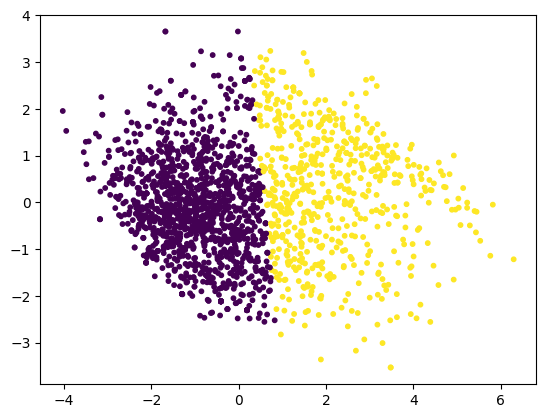

Cluster 0 nearest samples: 1586  建议政府搞流浪猫狗驱逐计划 我提议如果爱猫狗人士不愿政府扑杀流浪狗，那么政府可以搞一个流浪猫狗驱逐计划，向爱猫狗人士收税，把全国捕捉到流浪猫狗收集起来，用远洋货轮集装箱把它们送到外国，比如美国，加拿大，澳大利亚，印度，印度尼西亚，俄罗斯，巴西等。我支持中国那些祸患，无论是神神恨国党也好，还是流浪猫狗也好，感觉移民海外，应润尽润（误）
Cluster 1 nearest samples: 1758  建议把猫也算上 支持，但不够，建议把猫也算上，不然不好分辨有些人是爱护环境为了安全，还是趁机发泄，因为我己经看到好多说杀狗留猫的了


In [37]:
from sklearn.cluster import KMeans
import numpy as np

# 假设 n_clusters 是你想要的聚类数量
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(pca_array)

import matplotlib.pyplot as plt

plt.scatter(pca_array[:, 0], pca_array[:, 1], c=labels, cmap='viridis', s=10)
plt.show()

# 找到离每个聚类中心最近的两个样本
for i in range(n_clusters):
    distances = np.linalg.norm(pca_array - kmeans.cluster_centers_[i], axis=1)
    nearest_index = np.argmin(distances)
    print('Cluster', i, 'nearest samples:', nearest_index, df.iloc[nearest_index]['summary'], df.iloc[nearest_index]['content'])

In [39]:
from sklearn.cluster import KMeans
import numpy as np

# 假设 n_clusters 是你想要的聚类数量
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(stance_array)

# 找到离每个聚类中心最近的两个样本
for i in range(n_clusters):
    distances = np.linalg.norm(stance_array - kmeans.cluster_centers_[i], axis=1)
    nearest_index = np.argmin(distances)
    print('Cluster', i, 'nearest samples:', nearest_index, df.iloc[nearest_index]['summary'], df.iloc[nearest_index]['content'])

Cluster 0 nearest samples: 115  遗弃罪已经足够 遗弃罪还是不行，这把动物上升到了人的地位，遗弃罪已经有法律定义，指遗弃未成年子女、失去生活能力的老人，最好还是以危害公共安全为主
Cluster 1 nearest samples: 1722  全面从严从重处罚遗弃猫狗的人 全面从严从重处罚遗弃猫狗的人，如被遗弃流浪猫狗造成严重后果，应该判刑，上至无期。
Cluster 2 nearest samples: 1517  爱狗人士不处理只好国家出手 爱狗人士一直不处理只好国家出手咯


e:\miniconda3\envs\vllm-data\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
for platform, color in [('xhs','#B41212'), ('bili','#F36BEA'), ('dy','#090108'), ('zhihu','#1E7AD6')]:
    mask = df['platform'] == platform
    plt.scatter(pca_array[mask, 0], pca_array[mask, 1], label=platform, c=color, s=5)

plt.legend()
plt.show()

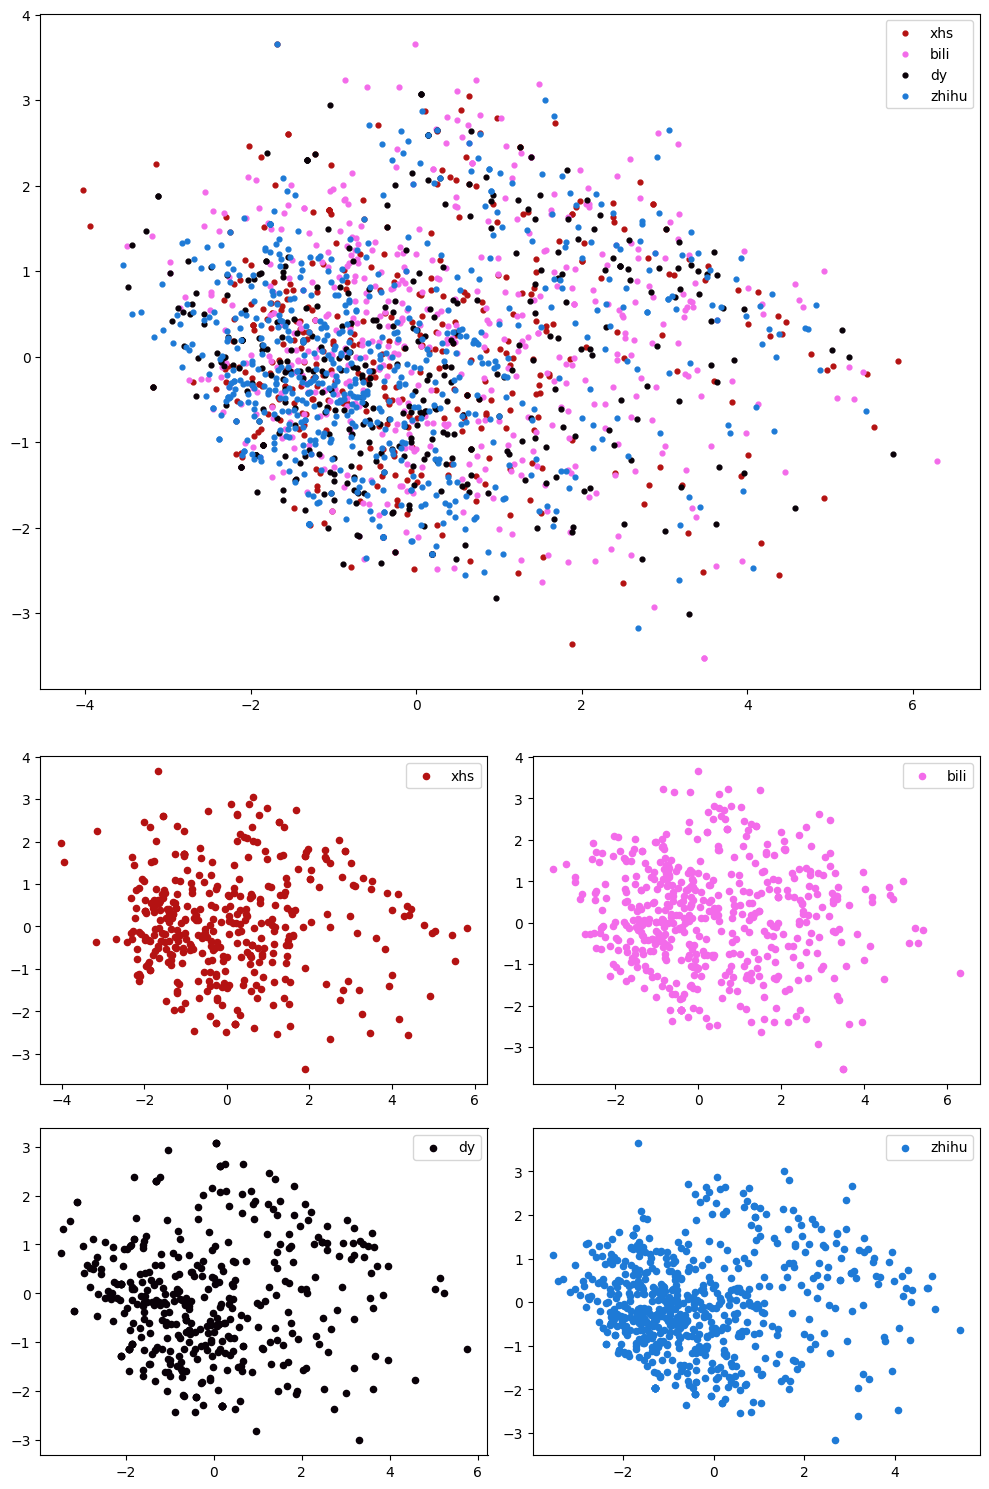

In [57]:
fig = plt.figure(figsize=(10, 15))

ax1 = fig.add_subplot(2, 1, 1)
for platform, color in [('xhs','#B41212'), ('bili','#F36BEA'), ('dy','#090108'), ('zhihu','#1E7AD6')]:
    mask = df['platform'] == platform
    ax1.scatter(pca_array[mask, 0], pca_array[mask, 1], label=platform, c=color, s=12)
ax1.legend()

# 四个平台单独的图
platforms = [('xhs','#B41212'), ('bili','#F36BEA'), ('dy','#090108'), ('zhihu','#1E7AD6')]
for i, (platform, color) in enumerate(platforms, start=2):
    ax = fig.add_subplot(4, 2, i+3)
    mask = df['platform'] == platform
    ax.scatter(pca_array[mask, 0], pca_array[mask, 1], label=platform, c=color, s=20)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
for platform, color in [('xhs','#B41212'), ('bili','#F36BEA'), ('dy','#090108'), ('zhihu','#1E7AD6')]:
    mask = df['platform'] == platform
    plt.scatter(tsne_array[mask, 0], tsne_array[mask, 1], label=platform, c=color, s=5)

plt.legend()
plt.show()

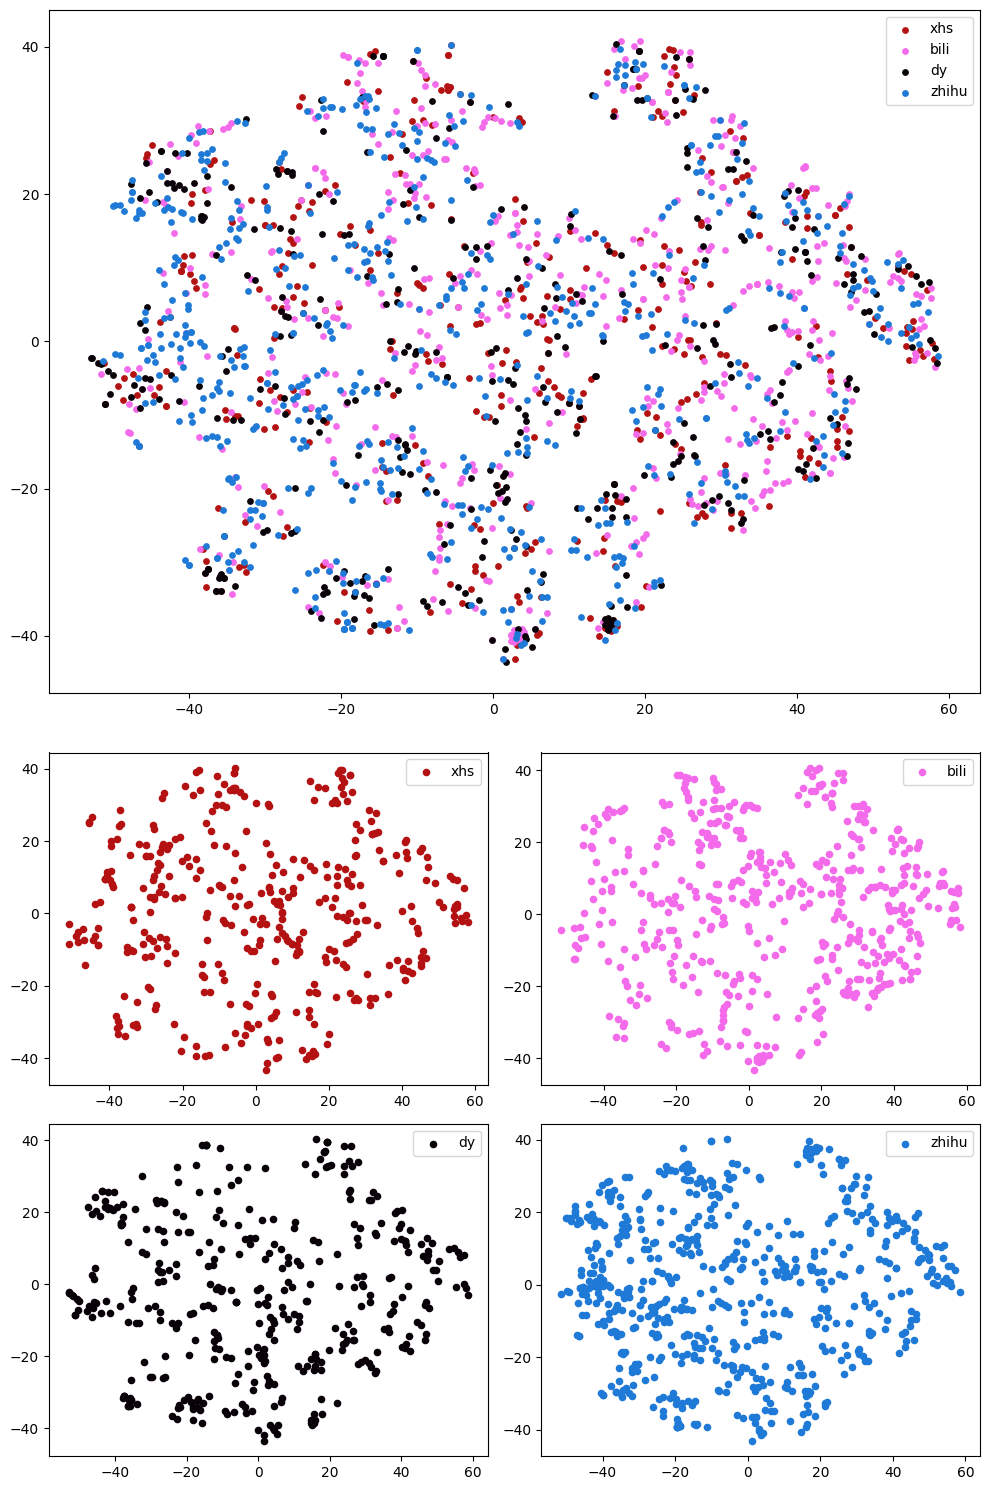

In [58]:
fig = plt.figure(figsize=(10, 15))

ax1 = fig.add_subplot(2, 1, 1)
for platform, color in [('xhs','#B41212'), ('bili','#F36BEA'), ('dy','#090108'), ('zhihu','#1E7AD6')]:
    mask = df['platform'] == platform
    ax1.scatter(tsne_array[mask, 0], tsne_array[mask, 1], label=platform, c=color, s=15)
ax1.legend()

# 四个平台单独的图
platforms = [('xhs','#B41212'), ('bili','#F36BEA'), ('dy','#090108'), ('zhihu','#1E7AD6')]
for i, (platform, color) in enumerate(platforms, start=2):
    ax = fig.add_subplot(4, 2, i+3)
    mask = df['platform'] == platform
    ax.scatter(tsne_array[mask, 0], tsne_array[mask, 1], label=platform, c=color, s=20)
    ax.legend()

plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
import numpy as np

cl1_obs = pd.DataFrame(index=[str(i) for i in range(10)])
cl1_obs
cl1_obs.rename(index={'1':'a'})

trans_append_dict = {
    "a": "A",
    "b": "B",
    "c": "C",
}

cl1_tag = {
    'Unnamed: 0': [str(i) for i in range(10)],  # 这将创建一个从 0 到 9 的列
    'tag': np.random.choice(['a', 'b', 'c'], 10)  # 这将创建一个随机的 'a', 'b', 'c' 的列
}

cl1_tag = pd.DataFrame(cl1_tag)

cl1_tag

for idx, row in cl1_tag.iterrows():
    if(row['tag'] in trans_append_dict):
        if row['Unnamed: 0'] in cl1_obs.index:
            cl1_obs = cl1_obs.rename(index={row['Unnamed: 0']: trans_append_dict[row['tag']]+'_'+row['Unnamed: 0']})

cl1_obs

""
B_0
C_1
C_2
A_3
B_4
B_5
C_6
C_7
A_8
C_9


In [1]:
import urllib.request

url = 'https://i3.meishichina.com/atta/step/2019/01/04/201901041546555701463266491.jpg?x-oss-process=style/p320'
dest_file = 'downloaded_image.jpg'  # 你想要保存的文件名

# 创建一个OpenerDirector实例
opener = urllib.request.build_opener()

# 添加用户代理头
opener.addheaders = [('User-agent', 'Mozilla/5.0')]

# 安装OpenerDirector实例作为默认的opener
urllib.request.install_opener(opener)

urllib.request.urlretrieve(url, dest_file)

('downloaded_image.jpg', <http.client.HTTPMessage at 0x1a8cff44370>)